In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

2024-12-03 02:35:01.862522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 02:35:01.882828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 02:35:01.888590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 02:35:01.905497: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 02:35:03.210098: W tensorflow/compiler/tf2

In [2]:
data_dir = '/home/anshu/Desktop/RPDT project/archive/casting_data/casting_data/'
train_path = data_dir + 'train/'
test_path = data_dir + 'test/'

In [3]:
train_image_loader = ImageDataGenerator(rescale=1/255, 
                                        zoom_range=0.1,
                                        horizontal_flip=1,
                                        vertical_flip=1)

# No augmentations for the test image loader
test_image_loader = ImageDataGenerator(rescale=1/255)

In [4]:
# Define constants
BATCH_SIZE = 32
IMAGE_DIM = (300, 300, 1)

In [5]:
train_split = train_image_loader.flow_from_directory(train_path, 
                                            target_size=IMAGE_DIM[:2],
                                            color_mode="grayscale",
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            shuffle=True,
                                            seed=0)

test_split = test_image_loader.flow_from_directory(test_path,
                                           target_size=IMAGE_DIM[:2],
                                           color_mode="grayscale",
                                           batch_size=BATCH_SIZE,
                                           class_mode='categorical',
                                           shuffle=False,
                                           seed=0)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [6]:
test_split.class_indices

{'def_front': 0, 'ok_front': 1}

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
def plot_batch(images, labels,rows,cols):

    fig = plt.figure(figsize = (20, 8))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)
        
        image = images[i]
        ax.imshow(np.squeeze(image),cmap='gray')
        label = "Not Defective" if labels[i][1] else "Defective"
        ax.set_title(label,loc='center',wrap=True,)
        ax.axis('off')

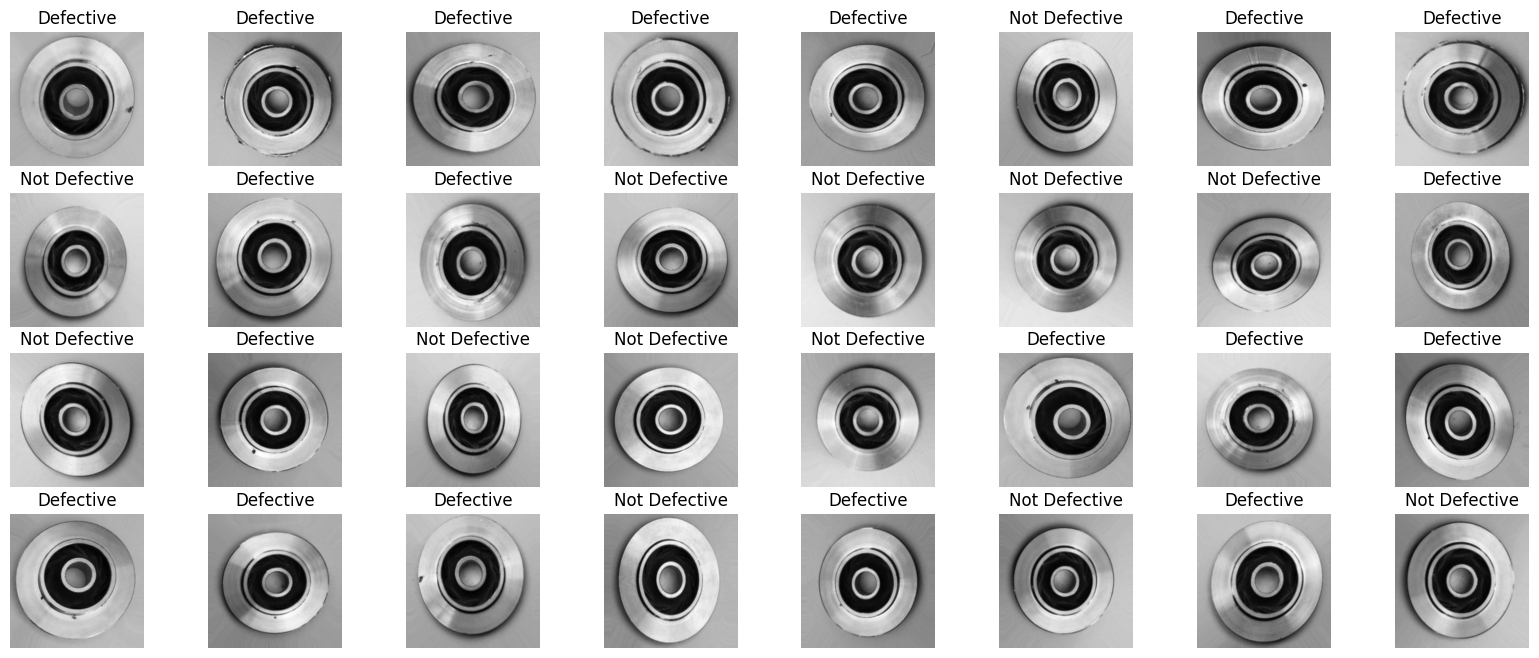

In [30]:
images, labels = train_split[0][0],train_split[0][1]
plot_batch(images, labels,rows=4,cols=8)

In [31]:
# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model

In [32]:
dnn3_model = Sequential()
dnn3_model.add(Flatten(input_shape=IMAGE_DIM))  # Add Keras Flatten layer to conver (300x300) image -> 90000 feature vector

dnn3_model.add(Dense(128, activation='relu')) 
dnn3_model.add(Dense(64, activation='relu')) 
dnn3_model.add(Dense(2, activation='softmax'))

/home/anshu/Downloads/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
dnn3_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
plot_model(dnn3_model, show_shapes=True, expand_nested=True, dpi=60)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


/home/anshu/Downloads/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 55s 261ms/step - accuracy: 0.5769 - loss: 5.0539
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 53s 255ms/step - accuracy: 0.6362 - loss: 1.3402
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 51s 246ms/step - accuracy: 0.7035 - loss: 0.8627
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 51s 246ms/step - accuracy: 0.6979 - loss: 0.7466
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 252ms/step - accuracy: 0.7137 - loss: 0.6383
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.7304 - loss: 0.5738
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.7296 - loss: 0.5592
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 51s 245ms/step - accuracy: 0.7560 - loss: 0.5285
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.7559 - loss: 0.5197
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 248ms/step - accuracy: 0.7193 - loss: 0.5495


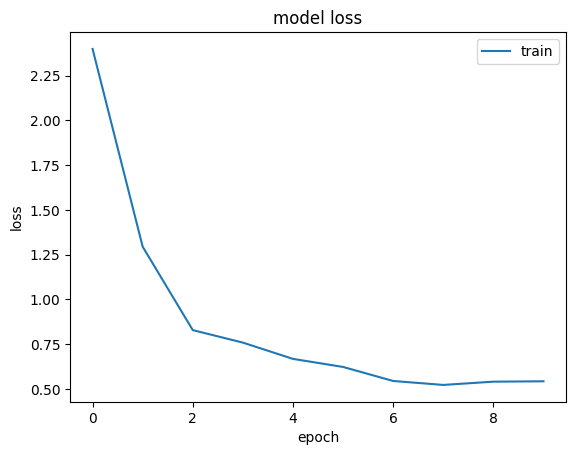

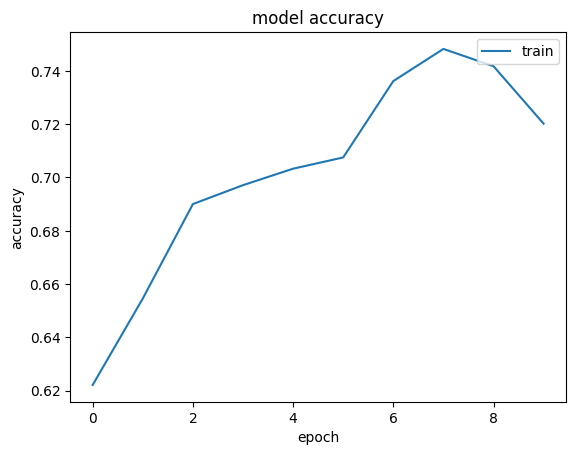

In [34]:
# Train the model
epochs = 10
history = dnn3_model.fit(train_split,epochs=epochs)

# Visualize the training curve
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [36]:

test_loss, test_acc = dnn3_model.evaluate(test_split)
print('Test accuracy:', test_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8036 - loss: 0.4012
Test accuracy: 0.8069930076599121


In [37]:

# 
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
cnn1_model = Sequential()
cnn1_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=IMAGE_DIM))   # We will use 32 of 3x3 kernals to learn
cnn1_model.add(MaxPooling2D(pool_size=(2, 2)))   # We use 2x2 max pooling
cnn1_model.add(Flatten())
cnn1_model.add(Dense(64, activation='relu'))
cnn1_model.add(Dense(2, activation='softmax'))

/home/anshu/Downloads/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the model
cnn1_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
plot_model(cnn1_model, show_shapes=True, expand_nested=True, dpi=60)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Epoch 1/2
208/208 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.5485 - loss: 3.6802
Epoch 2/2
208/208 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.5631 - loss: 0.6868


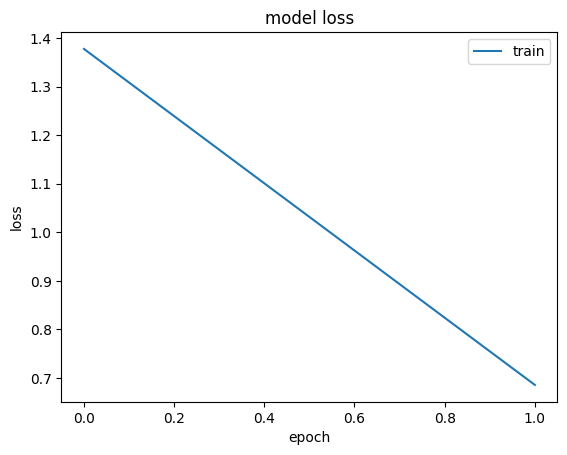

In [39]:
# Train the model
epochs = 2
history_1 = cnn1_model.fit(train_split, epochs=epochs)
# Visualize the training curve
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
# Save the CNN model to an .h5 file
cnn1_model.save('cnn1_h5.h5')


In [ ]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
cnn3_model = Sequential()


# CNN Layer 1
cnn3_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=IMAGE_DIM))
cnn3_model.add(MaxPooling2D((2, 2)))

# CNN Layer 2
cnn3_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3_model.add(MaxPooling2D(pool_size=(2, 2)))

# CNN Layer 3
cnn3_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
     

cnn3_model.add(Flatten())  

cnn3_model.add(Dense(128, activation='relu'))
cnn3_model.add(Dense(2, activation='softmax'))
     

# Compile the model
cnn3_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

plot_model(cnn3_model, show_shapes=True, expand_nested=True, dpi=60)
     
epochs = 10
history_3 = cnn3_model.fit(train_split, epochs=epochs)

plt.plot(history_3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
cnn3_score = cnn3_model.evaluate(test_split)
print('Test loss:', cnn3_score[0])
print('Test accuracy:', cnn3_score[1])

cnn3_model.save("cnn3_h5.h5")

In [42]:

from tensorflow.keras.models import load_model
cnn3_model = load_model('cnn3_h5.h5')

In [43]:
cnn3_score = cnn3_model.evaluate(test_split)
print('Test loss:', cnn3_score[0])
print('Test accuracy:', cnn3_score[1])

23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 509ms/step - accuracy: 0.9807 - loss: 0.0920
Test loss: 0.07455168664455414
Test accuracy: 0.9846153855323792


23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 539ms/step


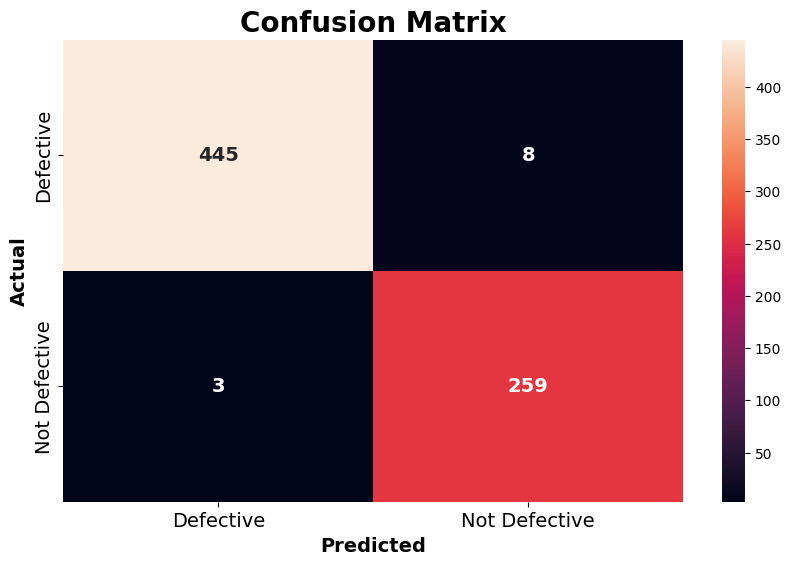

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

pred_probability = cnn3_model.predict(test_split)
predictions = pred_probability.argmax(axis=1)

plt.figure(figsize=(10,6))
plt.title("Confusion Matrix", size=20, weight='bold')
sns.heatmap(
    confusion_matrix(test_split.classes, predictions),
    annot=True,
    annot_kws={'size':14, 'weight':'bold'},
    fmt='d',
    xticklabels=['Defective', 'Not Defective'],
    yticklabels=['Defective', 'Not Defective'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

/home/anshu/Downloads/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7761 - loss: 0.4772
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.8952 - loss: 0.6175
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - accuracy: 0.9807 - loss: 0.0920
DNN Model Accuracy: 0.79
Basic CNN Accuracy: 0.63
Improved CNN Accuracy: 0.98


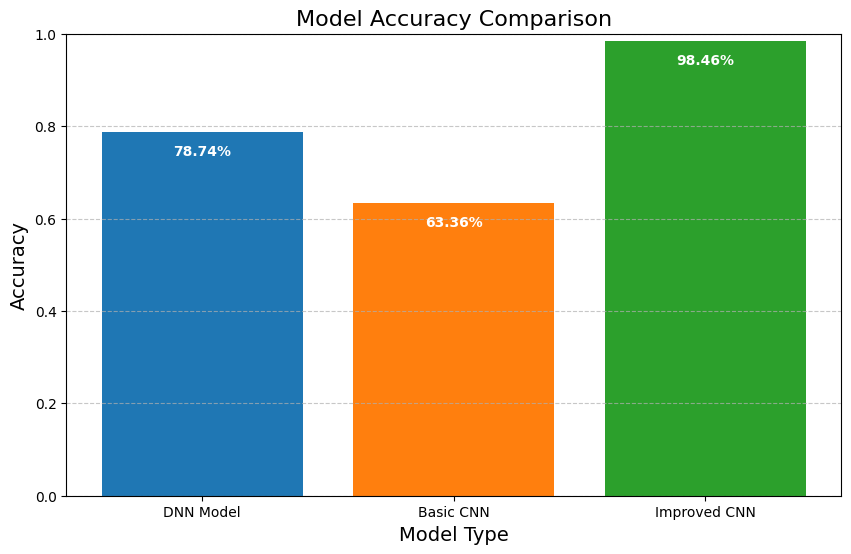

In [8]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Paths to your saved models
dnn_model_path = 'dnn3_h5.h5'
basic_cnn_model_path = 'cnn1_h5.h5'
improved_cnn_model_path = 'cnn3_h5.h5'

# Load the saved models
dnn3_model = load_model(dnn_model_path)
cnn1_model = load_model(basic_cnn_model_path)
cnn3_model = load_model(improved_cnn_model_path)

# Evaluate models on test data
# Replace `test_split` with your test dataset generator or array
dnn_test_loss, dnn_test_acc = dnn3_model.evaluate(test_split)
cnn1_test_loss, cnn1_test_acc = cnn1_model.evaluate(test_split)
cnn3_test_loss, cnn3_test_acc = cnn3_model.evaluate(test_split)

# Print the test accuracies
print(f"DNN Model Accuracy: {dnn_test_acc:.2f}")
print(f"Basic CNN Accuracy: {cnn1_test_acc:.2f}")
print(f"Improved CNN Accuracy: {cnn3_test_acc:.2f}")

# Define model names and their respective accuracies
models = ['DNN Model', 'Basic CNN', 'Improved CNN']
accuracies = [dnn_test_acc, cnn1_test_acc, cnn3_test_acc]

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding the accuracy values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.05, 
             f'{bar.get_height() * 100:.2f}%', 
             ha='center', 
             color='white', 
             fontweight='bold')

# Graph title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model Type', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Setting y-axis from 0 to 1 as accuracy is a percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.show()


2024-12-03 04:13:12.468313: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 330366976 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction: Defective
Confidence: 99.53%


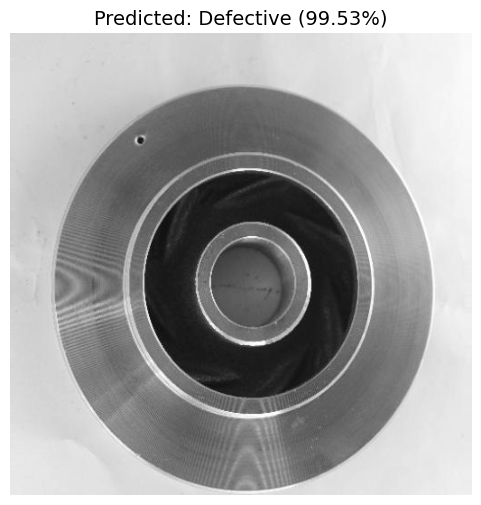

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tkinter import Tk, filedialog

IMAGE_DIM = (300, 300, 1)  # (Height, Width, Channels)
CLASS_NAMES = ['Defective', 'Not Defective']

cnn3_model = load_model('cnn3_h5.h5')

def preprocess_image(image_path):
 
  
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Resize the image to (300, 300)
    image = cv2.resize(image, (IMAGE_DIM[0], IMAGE_DIM[1]))

    # Normalize the image (scale pixel values to [0, 1])
    image = image / 255.0

    # Reshape the image to (1, 300, 300, 1)
    image = image.reshape(1, IMAGE_DIM[0], IMAGE_DIM[1], 1)

    return image

# Function to predict the class of the input image
def predict_defect(image_path):
 
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Perform prediction
    prediction = cnn3_model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the prediction results
    confidence = prediction[0][predicted_class] * 100
    label = CLASS_NAMES[predicted_class]

    print(f"Prediction: {label}")
    print(f"Confidence: {confidence:.2f}%")

    # Plot the image and prediction result
    plt.figure(figsize=(6, 6))
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {label} ({confidence:.2f}%)", size=14)
    plt.axis('off')
    plt.show()

# Confusion Matrix and Evaluation
def evaluate_model(test_data):
    
    pred_probability = cnn3_model.predict(test_data)
    predictions = pred_probability.argmax(axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Confusion Matrix", size=20, weight='bold')
    sns.heatmap(
        confusion_matrix(test_data.classes, predictions),
        annot=True,
        annot_kws={'size': 14, 'weight': 'bold'},
        fmt='d',
        xticklabels=CLASS_NAMES,
        yticklabels=CLASS_NAMES
    )
    plt.tick_params(axis='both', labelsize=14)
    plt.ylabel('Actual', size=14, weight='bold')
    plt.xlabel('Predicted', size=14, weight='bold')
    plt.show()


def upload_image():
    root = Tk()
    root.withdraw()  
    file_path = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image files", "*.jpg *.jpeg *.png")]
    )
    return file_path


if __name__ == "__main__":
   
    image_path = upload_image()

    if image_path:
        try:
            # Predict the class of the selected image
            predict_defect(image_path)
        except Exception as e:
            print(f"Error: {e}")
    else:
        print("No file selected. Please try again.")
